# Activity 13: K-NN Multiclass Classifier

This activity uses the K-NN model to classify the MNIST dataset.

Import the following packages

In [1]:
import struct
import numpy as np
import gzip
import urllib.request
import matplotlib.pyplot as plt
from array import array
from sklearn.neighbors import KNeighborsClassifier as KNN

Load the MNIST data into memory

1. Training images

In [2]:
with gzip.open('train-images-idx3-ubyte.gz', 'rb') as f:
    magic, size, rows, cols = struct.unpack(">IIII", f.read(16))

    img = np.array(array("B", f.read())).reshape((size, rows, cols))

2. Training labels

In [3]:
with gzip.open('train-labels-idx1-ubyte.gz', 'rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    labels = np.array(array("B", f.read()))

3. Test images

In [4]:
with gzip.open('t10k-images-idx3-ubyte.gz', 'rb') as f:
    magic, size, rows, cols = struct.unpack(">IIII", f.read(16))

    img_test = np.array(array("B", f.read())).reshape((size, rows, cols))

4. Test labels

In [5]:
with gzip.open('t10k-labels-idx1-ubyte.gz', 'rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    labels_test = np.array(array("B", f.read()))

Visualise a sample of the data

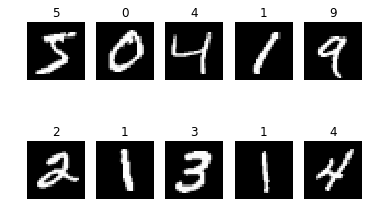

In [6]:
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(img[i], cmap='gray');
    plt.title(f'{labels[i]}');
    plt.axis('off')

## Construct a K Nearest Neighbours Classification Model

Construct a KNN classifier, with 3 nearest neighbours to classify the MNIST dataset.  Again to save in processing power randomly sample 5000 images for use in training.

In [7]:
selection = np.random.choice(len(img), 5000)
selected_images = img[selection]
selected_labels = labels[selection]

In order to provide the image information to the Logistic model we must first flatten the data out so that each image is 1 x 784 pixels in shape.

In [8]:
selected_images = selected_images.reshape((-1, rows * cols))
selected_images.shape

(5000, 784)

Build the 3 neighbour KNN model and fit the data to the model.  **Note: in this activity we are providing 784 features or *dimensions* to the model, not simply 2**.

In [9]:
model = KNN(n_neighbors=3)
model.fit(X=selected_images, y=selected_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

Determine the score against the training set

In [10]:
model.score(X=selected_images, y=selected_labels)

0.9692

Display the first two predictions for the Logistic model against the training data

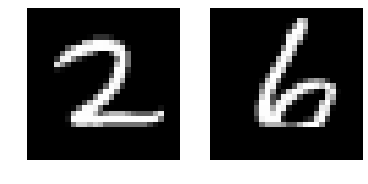

In [12]:
model.predict(selected_images)[:2]

plt.subplot(1, 2, 1)
plt.imshow(selected_images[0].reshape((28, 28)), cmap='gray');
plt.axis('off');
plt.subplot(1, 2, 2)
plt.imshow(selected_images[1].reshape((28, 28)), cmap='gray');
plt.axis('off');

Compare the performance against the test set

In [13]:
model.score(X=img_test.reshape((-1, rows * cols)), y=labels_test)

0.9376

How did the performance of the KNN model compare with the logistic regression model?